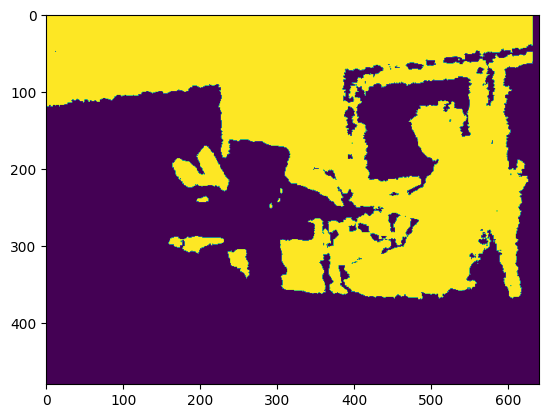

KeyboardInterrupt: 

In [3]:
import freenect
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline 
threshold = 100
current_depth =1000
depth, timestamp = freenect.sync_get_depth()
depth = 255 * np.logical_and(depth >= current_depth - threshold,
                            depth <= current_depth + threshold)
depth = depth.astype(np.uint8)
im = plt.imshow(depth)


while True:
    depth, timestamp = freenect.sync_get_depth()
    depth = 255 * np.logical_and(depth >= current_depth - threshold, depth <= current_depth + threshold)
    depth = depth.astype(np.uint8)
    #print(np.sum(depth))
    im.set_data(depth)
    plt.pause(0.02)
plt.show()

In [3]:
import numpy as np


def pretty_depth(depth):
    """Converts depth into a 'nicer' format for display

    This is abstracted to allow for experimentation with normalization

    Args:
        depth: A numpy array with 2 bytes per pixel

    Returns:
        A numpy array that has been processed with unspecified datatype
    """
    np.clip(depth, 0, 2**10 - 1, depth)
    depth >>= 2
    depth = depth.astype(np.uint8)
    return depth


def pretty_depth_cv(depth):
    """Converts depth into a 'nicer' format for display

    This is abstracted to allow for experimentation with normalization

    Args:
        depth: A numpy array with 2 bytes per pixel

    Returns:
        A numpy array with unspecified datatype
    """
    return pretty_depth(depth)


def video_cv(video):
    """Converts video into a BGR format for display

    This is abstracted out to allow for experimentation

    Args:
        video: A numpy array with 1 byte per pixel, 3 channels RGB

    Returns:
        A numpy array with with 1 byte per pixel, 3 channels BGR
    """
    return video[:, :, ::-1]  # RGB -> BGR


In [2]:
cv2.destroyAllWindows()


In [4]:
import freenect
import cv2
import numpy as np


threshold = 100
current_depth = 0


def change_threshold(value):
    global threshold
    threshold = value


def change_depth(value):
    global current_depth
    current_depth = value


def show_depth():
    global threshold
    global current_depth

    depth, timestamp = freenect.sync_get_depth()
    depth = 255 * np.logical_and(depth >= current_depth - threshold,
                                 depth <= current_depth + threshold)
    depth = depth.astype(np.uint8)
    cv2.imshow('Depth', depth)


def show_video():
    cv2.imshow('Video', video_cv(freenect.sync_get_video()[0]))


cv2.namedWindow('Depth')
cv2.namedWindow('Video')
cv2.createTrackbar('threshold', 'Depth', threshold,     500,  change_threshold)
cv2.createTrackbar('depth',     'Depth', current_depth, 2048, change_depth)

print('Press ESC in window to stop')


while 1:
    show_depth()
    show_video()
    if cv2.waitKey(10) == 27:
        
        break
cv2.destroyAllWindows()


Press ESC in window to stop
